# training_classifier
> train classifier with data augmentation, explain model with some visualizations to infer robustness of model

In [ ]:
from asl_detection.classification.utils import *

Found 57600 images belonging to 26 classes.
Found 14400 images belonging to 26 classes.


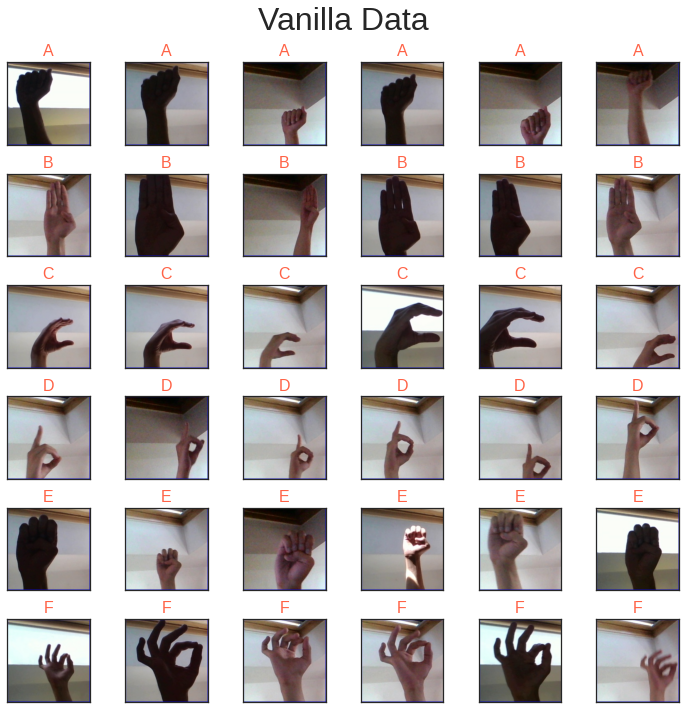

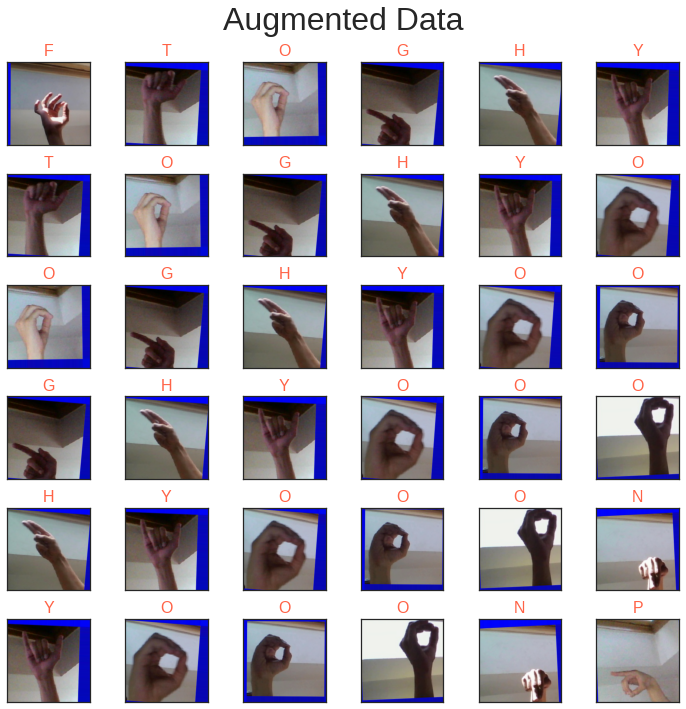

In [ ]:
train_path = '/home/nic/data/asl/asl_classification/1gb/train'
test_path = '/home/nic/data/asl/asl_classification/1gb/test'
model = Classifier()
batch_size = 128
model.generate_data(train_path, test_path, batch_size)

use `mobilenet` as the feature extractor

In [ ]:
model.set_feature_extractor(name='mobilenet', summary=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

if dataset, batchsize, imgsize changes or is initialized, set save to `True`

In [ ]:
model.extract_and_save('/home/nic/data/asl/latent_vectors/1gb', 1024, save=True)

  0%|          | 0/113 [00:00<?, ?it/s]


loss and accuracy does not diverge, suggests that model is not overfitting or underfitting

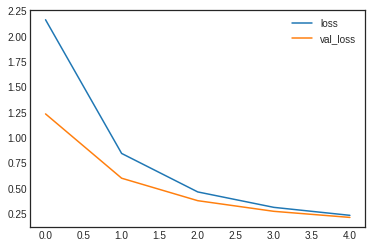

450/450 [==============================] - 3s 6ms/step - loss: 0.2339 - accuracy: 0.9657 - val_loss: 0.2134 - val_accuracy: 0.9673
Training accuracy: 0.966
Training loss: 2.160
Validation accuracy: 0.967
Validation loss: 1.233
CPU times: user 18.6 s, sys: 1.5 s, total: 20.1 s
Wall time: 15.1 s


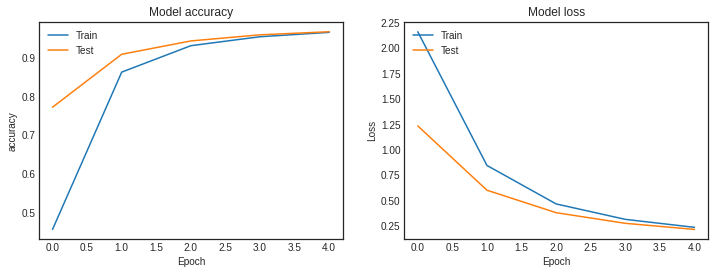

In [ ]:
%%time
from tensorflow.keras import optimizers

model.train(lr=1e-4,
            optimizer=optimizers.RMSprop,
            epochs=5,
            decay_lr=False,
            save_folder='./results/classification',
            notification = False)

view feature maps in first `_layers` layers

the pretrained classifer has good edge detectors that can help pick out the hands

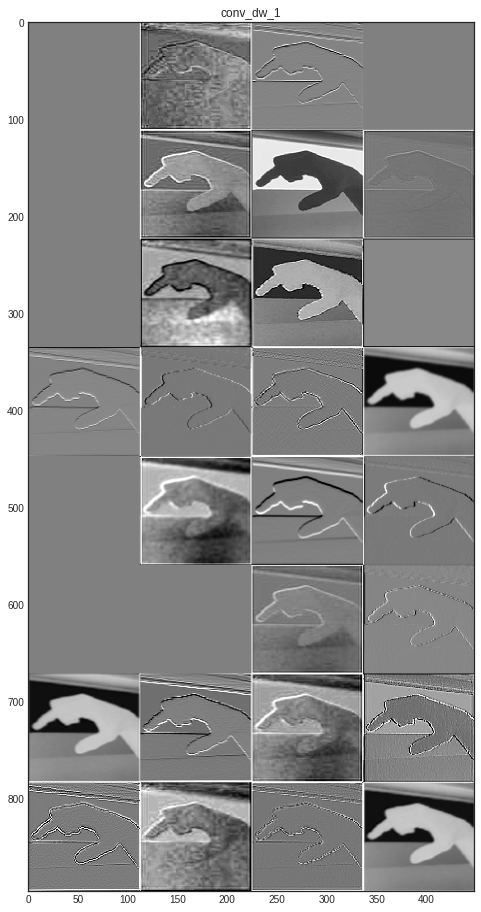

In [ ]:
index = 11
model.visualize_feature_maps(index, _layers=1)

infer the robustness of the classifier by seeing its attention
- classifier seems to divert more attention to the pinkie and the relevant 3 fingers in the air for `I` and `F` respectively
- however, attention for `U` seems to be misplaced

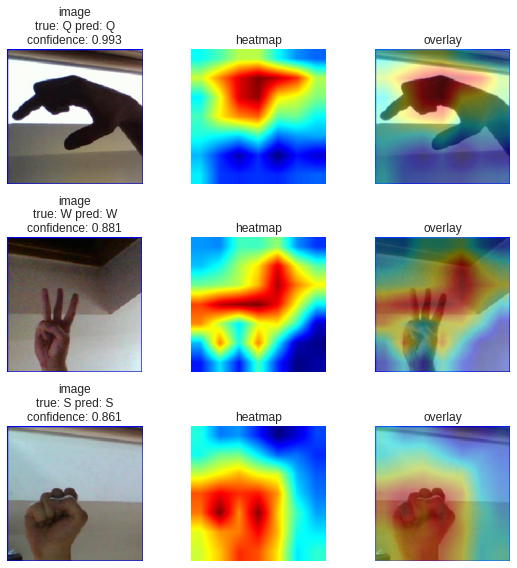

In [ ]:
model.visualize_heat_maps(index, rows=3)

again attention for `F` seems correct, `H` as well, however, `W` and `T` seems wrong

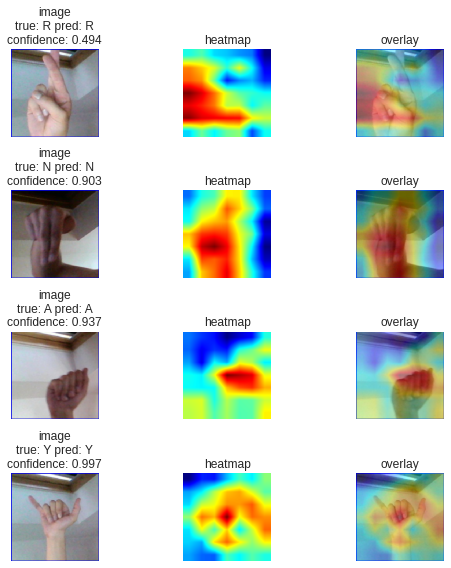

In [ ]:
index = 40
model.visualize_heat_maps(index, rows=4)